In [1]:
from dask import dataframe as dd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/karenrugerio/Desktop/Reto/train_labels.csv')
df

,customer_ID,target
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0
1,00000fd6641609c6ece5454664794f0340ad84dddce9a2...,0
2,00001b22f846c82c51f6e3958ccd81970162bae8b007e8...,0
3,000041bdba6ecadd89a52d11886e8eaaec9325906c9723...,0
4,00007889e4fcd2614b6cbe7f8f3d2e5c728eca32d9eb8a...,0
...,...,...
458908,ffff41c8a52833b56430603969b9ca48d208e7c192c6a4...,0
458909,ffff518bb2075e4816ee3fe9f3b152c57fc0e6f01bf7fd...,0
458910,ffff9984b999fccb2b6127635ed0736dda94e544e67e02...,0
458911,ffffa5c46bc8de74f5a4554e74e239c8dee6b9baf38814...,1


In [3]:
df2 = pd.read_csv('/Users/karenrugerio/Desktop/Reto/train_data.csv', nrows=5000)
df2



,customer_ID,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,B_3,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,0.004709,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,0.002714,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,0.009423,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,0.005531,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,0.009312,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,2017-07-04,0.657808,0.001777,0.003075,1.007333,0.005508,0.113835,0.000982,0.010974,...,NaN,NaN,NaN,0.001438,0.006279,0.000299,NaN,0.000468,0.004601,0.005537
4996,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,2017-08-22,0.648326,0.037199,0.013117,1.001555,0.002263,0.102417,0.004969,0.016958,...,NaN,NaN,NaN,0.002435,0.006563,0.003092,NaN,0.001741,0.007648,0.005131
4997,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,2017-09-22,0.649564,0.059149,0.039489,0.999506,0.008046,0.091262,0.007755,0.003238,...,NaN,NaN,NaN,0.005840,0.005406,0.009603,NaN,0.007958,0.004095,0.006037
4998,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,2017-10-29,0.639805,0.009314,0.003189,1.008369,0.007528,0.087387,0.002087,0.010699,...,NaN,NaN,NaN,0.003712,0.000396,0.002458,NaN,0.007788,0.009767,0.002597


In [4]:
df3 = pd.merge(df,df2) 
df3

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,0,2017-07-04,0.657808,0.001777,0.003075,1.007333,0.005508,0.113835,0.000982,...,NaN,NaN,NaN,0.001438,0.006279,0.000299,NaN,0.000468,0.004601,0.005537
4996,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,0,2017-08-22,0.648326,0.037199,0.013117,1.001555,0.002263,0.102417,0.004969,...,NaN,NaN,NaN,0.002435,0.006563,0.003092,NaN,0.001741,0.007648,0.005131
4997,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,0,2017-09-22,0.649564,0.059149,0.039489,0.999506,0.008046,0.091262,0.007755,...,NaN,NaN,NaN,0.005840,0.005406,0.009603,NaN,0.007958,0.004095,0.006037
4998,003fb2fb61d1920280cfe5fb1a18aae1b93409f13bd0f3...,0,2017-10-29,0.639805,0.009314,0.003189,1.008369,0.007528,0.087387,0.002087,...,NaN,NaN,NaN,0.003712,0.000396,0.002458,NaN,0.007788,0.009767,0.002597


In [5]:
user0 = df3[df3.target == 0].head(1)
user0 = pd.DataFrame(user0).reset_index()
list(user0['customer_ID'])[0]


'0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a'

In [6]:
user1 = df3[df3.target == 1].head(1)
user1 = pd.DataFrame(user1).reset_index()
list(user1['customer_ID'])[0]

'0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85'

In [7]:
from operator import index


In [8]:

dfUser0 = df3.query('customer_ID == "0000099d6bd597052cdcda90ffabf56573fe9d7c79be5fbac11a8ed792feb62a"')
dfUser0

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
0,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-03-09,0.938469,0.001733,0.008724,1.006838,0.009228,0.124035,0.008771,...,NaN,NaN,NaN,0.002427,0.003706,0.003818,NaN,0.000569,0.000610,0.002674
1,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-04-07,0.936665,0.005775,0.004923,1.000653,0.006151,0.126750,0.000798,...,NaN,NaN,NaN,0.003954,0.003167,0.005032,NaN,0.009576,0.005492,0.009217
2,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-05-28,0.954180,0.091505,0.021655,1.009672,0.006815,0.123977,0.007598,...,NaN,NaN,NaN,0.003269,0.007329,0.000427,NaN,0.003429,0.006986,0.002603
3,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-06-13,0.960384,0.002455,0.013683,1.002700,0.001373,0.117169,0.000685,...,NaN,NaN,NaN,0.006117,0.004516,0.003200,NaN,0.008419,0.006527,0.009600
4,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-07-16,0.947248,0.002483,0.015193,1.000727,0.007605,0.117325,0.004653,...,NaN,NaN,NaN,0.003671,0.004946,0.008889,NaN,0.001670,0.008126,0.009827
5,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-08-04,0.945964,0.001746,0.007863,1.005006,0.004220,0.110946,0.009857,...,NaN,NaN,NaN,0.001924,0.008598,0.004529,NaN,0.000674,0.002223,0.002884
6,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-09-18,0.940705,0.002183,0.018859,1.008024,0.004509,0.103329,0.006603,...,NaN,NaN,NaN,0.001336,0.004361,0.009387,NaN,0.007727,0.007661,0.002225
7,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-10-08,0.914767,0.003029,0.014324,1.000242,0.000263,0.108115,0.009527,...,NaN,NaN,NaN,0.002397,0.008452,0.005553,NaN,0.001831,0.009616,0.007385
8,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-11-20,0.950845,0.009896,0.016888,1.003995,0.001789,0.102792,0.002519,...,NaN,NaN,NaN,0.009742,0.003968,0.007945,NaN,0.008722,0.004369,0.000995
9,0000099d6bd597052cdcda90ffabf56573fe9d7c79be5f...,0,2017-12-04,0.868580,0.001082,0.001930,1.007504,0.001772,0.100470,0.004626,...,NaN,NaN,NaN,0.003611,0.009607,0.007266,NaN,0.008763,0.004753,0.009068


In [9]:
dfUser1 = df3.query('customer_ID == "0000f99513770170a1aba690daeeb8a96da4a39f11fc27da5c30a79db61c1e85"')
dfUser1

,customer_ID,target,S_2,P_2,D_39,B_1,B_2,R_1,S_3,D_41,...,D_136,D_137,D_138,D_139,D_140,D_141,D_142,D_143,D_144,D_145
104,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-03-15,0.400025,0.000278,0.954861,0.023890,0.003140,NaN,0.008421,...,NaN,NaN,NaN,1.002518,0.001170,0.870115,0.141214,1.003923,0.008945,0.736632
105,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-04-14,0.405788,0.000269,0.944042,0.025613,0.008950,NaN,0.003707,...,NaN,NaN,NaN,1.005944,0.003116,0.864712,0.145885,1.004833,0.002125,0.733311
106,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-05-15,0.403615,0.032850,0.940261,0.026016,0.009074,NaN,0.008000,...,NaN,NaN,NaN,1.006883,0.004455,0.871729,0.144555,1.000521,0.000765,0.729252
107,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-06-14,0.391495,0.034461,0.936253,0.029538,0.005778,NaN,0.002849,...,NaN,NaN,NaN,1.000132,0.002175,0.869414,0.151890,1.001034,0.008195,0.727660
108,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-07-15,0.392356,0.037955,0.915764,0.028671,0.008595,NaN,0.002428,...,NaN,NaN,NaN,1.001192,0.004609,0.869089,0.152654,1.007116,0.001493,0.727649
109,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-08-15,0.401854,0.037644,0.916998,0.025473,0.000882,NaN,0.008978,...,NaN,NaN,NaN,1.001985,0.002808,0.872574,0.161635,1.000121,0.000795,0.728578
110,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-09-14,0.413979,0.037810,0.920879,0.026374,0.005886,NaN,0.008085,...,NaN,NaN,NaN,1.002934,0.001223,0.871060,0.169187,1.002862,0.007641,0.737226
111,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-10-14,0.413900,0.036082,0.916793,0.024629,0.008220,NaN,0.002384,...,NaN,NaN,NaN,1.009672,0.007612,0.868228,0.168932,1.001409,0.003188,0.824853
112,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-11-14,0.408234,0.030466,0.912386,0.020954,0.003926,NaN,0.005525,...,NaN,NaN,NaN,1.000569,0.004888,0.873915,0.169258,1.002945,0.004917,0.731010
113,0000f99513770170a1aba690daeeb8a96da4a39f11fc27...,1,2017-12-17,0.408131,0.097428,0.932366,0.020943,0.008163,0.166899,0.004582,...,NaN,NaN,NaN,1.002598,0.000091,0.870157,0.173529,1.003708,0.007586,0.733164


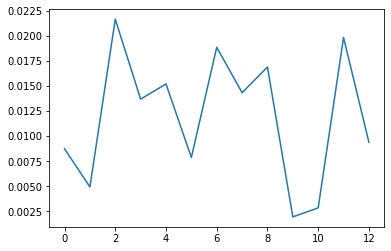

In [14]:
plt.plot(dfUser0.B_1)


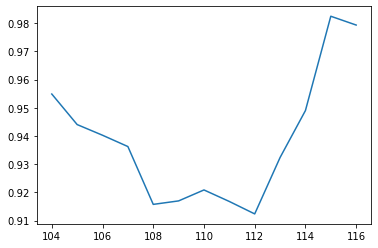

In [15]:
plt.plot(dfUser1.B_1)